In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from scipy.linalg import pinv

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df = df.iloc[:,1:]

In [4]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

In [5]:
df.shape

(828260, 12)

In [6]:
X = df.drop(['Label-0/1'] , axis = 1)
y = df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
    random_state = 42,
    test_size = 0.2)

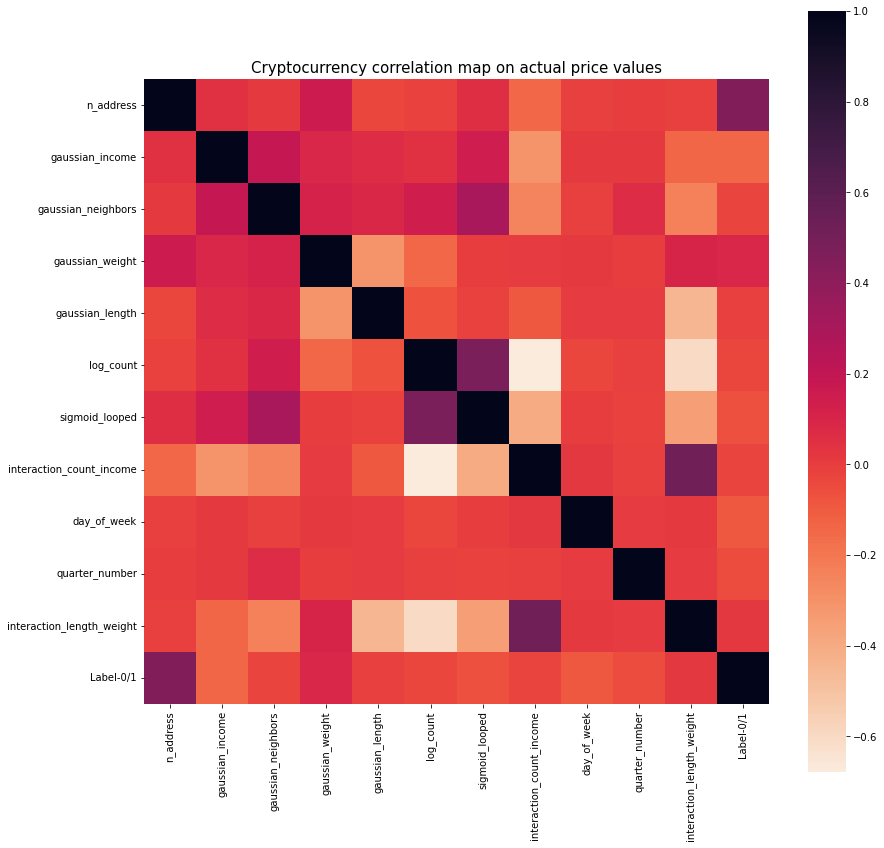

In [8]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=1., square=True, cmap="rocket_r")
plt.title("Cryptocurrency correlation map on actual price values", fontsize=15)
plt.show()

In [9]:
corrmat

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
n_address,1.000000,0.048060,0.014704,0.157196,-0.034610,-0.020205,0.057026,-0.143904,-0.004158,-0.000637,-0.006130,0.454879
gaussian_income,0.048060,1.000000,0.182646,0.093783,0.063846,0.044987,0.143984,-0.307972,0.012108,0.014634,-0.134553,-0.140206
gaussian_neighbors,0.014704,0.182646,1.000000,0.113081,0.084066,0.139265,0.304597,-0.247895,-0.009801,0.062543,-0.233131,-0.025519
gaussian_weight,0.157196,0.093783,0.113081,1.000000,-0.305070,-0.147229,0.001119,0.008171,0.016044,0.001907,0.107920,0.092873
gaussian_length,-0.034610,0.063846,0.084066,-0.305070,1.000000,-0.073630,-0.019398,-0.091615,0.003588,0.003551,-0.448472,-0.012634
log_count,-0.020205,0.044987,0.139265,-0.147229,-0.073630,1.000000,0.481707,-0.678419,-0.031511,-0.016010,-0.605005,-0.030317
sigmoid_looped,0.057026,0.143984,0.304597,0.001119,-0.019398,0.481707,1.000000,-0.397924,-0.002138,-0.018040,-0.348939,-0.063350
interaction_count_income,-0.143904,-0.307972,-0.247895,0.008171,-0.091615,-0.678419,-0.397924,1.000000,0.019500,-0.006054,0.518109,-0.023558
day_of_week,-0.004158,0.012108,-0.009801,0.016044,0.003588,-0.031511,-0.002138,0.019500,1.000000,0.005620,0.012791,-0.089920
quarter_number,-0.000637,0.014634,0.062543,0.001907,0.003551,-0.016010,-0.018040,-0.006054,0.005620,1.000000,0.006072,-0.051174


There ia high correlation between
- interaction_count_income and interaction_length_weight
- log_count and sigmoid_looped
- n_address and label-0/1

let us consider the above 4 features as our best features

In [10]:
rf_clf_1 = pickle.load(open("randomforest_model.sav",'rb'))

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Sam\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.3 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [11]:
X_train_new = X_train[['n_address','interaction_count_income','interaction_length_weight','log_count','sigmoid_looped']]

In [12]:
rf_clf_1.fit(X_train_new,y_train)

RandomForestClassifier(max_depth=100, max_features='log2', n_estimators=10)

In [13]:
rf_preds = rf_clf_1.predict(X_train_new)

In [14]:
rf_preds

array([0., 1., 0., ..., 0., 1., 0.])

In [15]:
accuracy = accuracy_score(y_true = y_train, y_pred = rf_preds)
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 0.7762010117595924


In [16]:
recall_score = recall_score(y_true = y_train, y_pred = rf_preds)
print("Recall for our testing dataset",recall_score)

Recall for our testing dataset 0.661012036844155


In [17]:
cm= confusion_matrix(y_train,rf_preds)

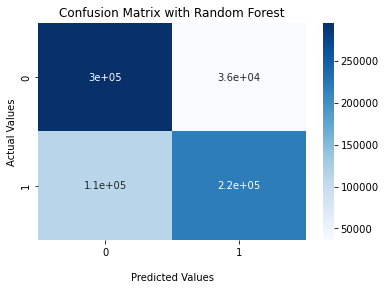

In [18]:
ax = sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_title("Confusion Matrix with Random Forest")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values")
plt.show()

In [19]:
svm_clf_1 = pickle.load(open("svc_model.sav",'rb'))

In [20]:
svm_clf_1.fit(X_train_new,y_train)

SGDClassifier(alpha=1e-06, class_weight='balanced', n_jobs=-1,
              penalty='elasticnet', random_state=42)

In [21]:
svm_preds = svm_clf_1.predict(X_train_new)

In [22]:
accuracy = accuracy_score(y_true = y_train, y_pred = svm_preds)
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 0.6604342235529906


In [23]:
recall_score_svm = recall_score(y_true = y_train, y_pred = svm_preds)
print("Recall for our training dataset",recall_score_svm)

TypeError: 'numpy.float64' object is not callable

In [24]:
filename = 'randomforest_model_correlation.sav'
pickle.dump(rf_clf_1, open(filename, 'wb'))

In [25]:
filename = 'svm_model_correlation.sav'
pickle.dump(svm_clf_1, open(filename, 'wb'))